In this Notebook, we will show why you "one of the RIGHT ways" to apply a Simple Linear Regression to Stock Pricing for Prediction....

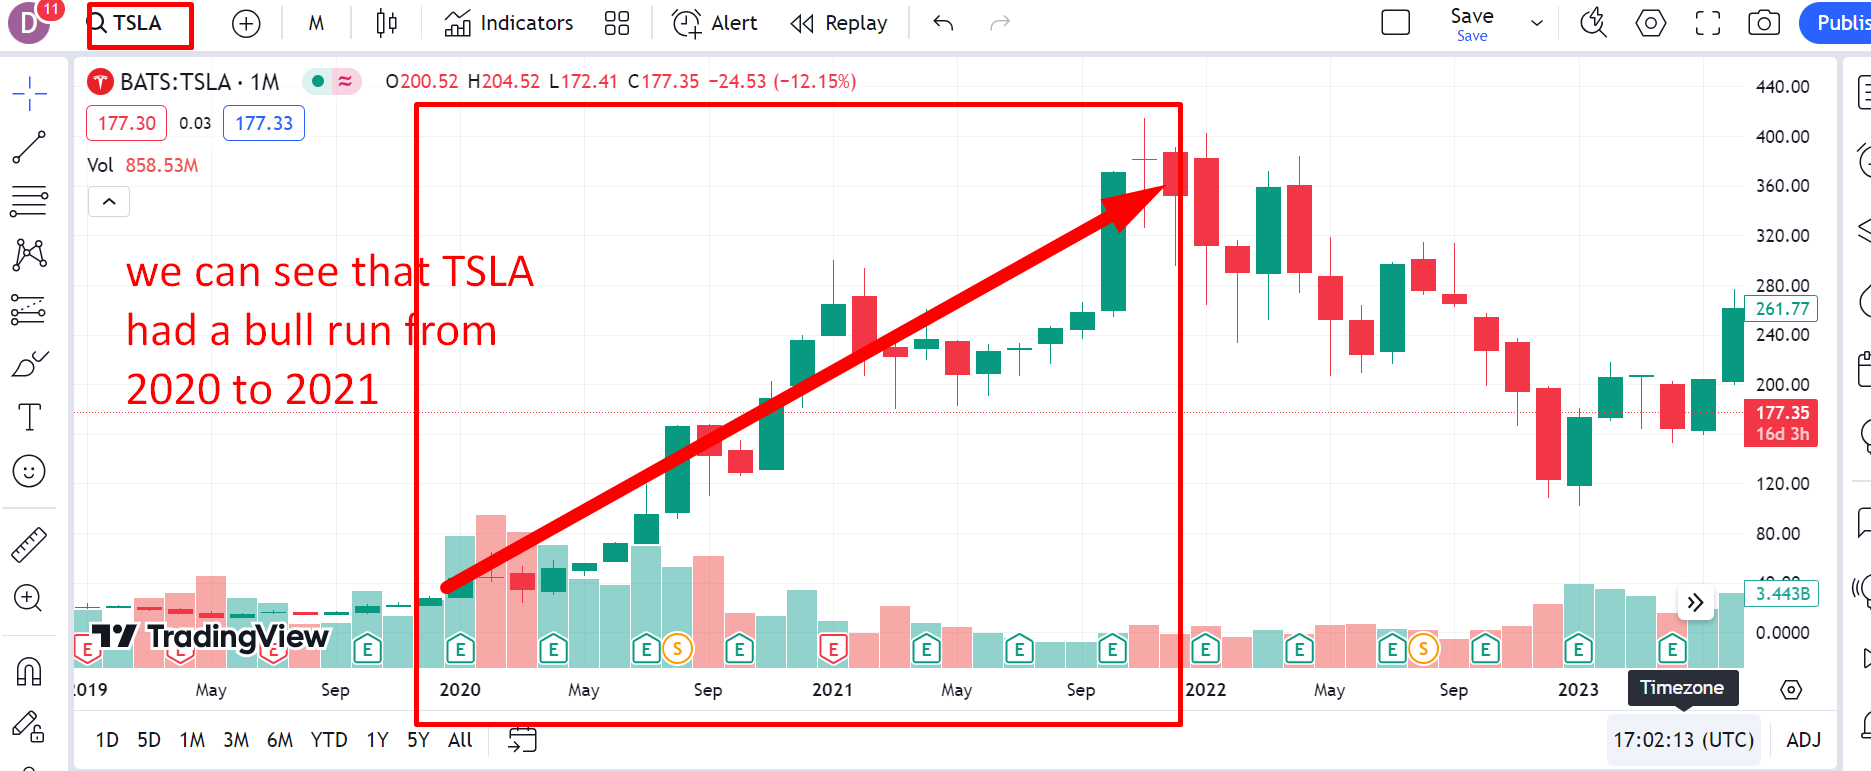

#Step 1: Pip Install and Import Libraries

In [2]:
#Import Libraries

!pip install yfinance
import yfinance as yf
import pandas as pd



---



#Step 2: Import Dataset and Plot

In [3]:
#Import Data from 2020 to 2021

ticker = 'TSLA'
df = yf.download(\
                 ticker,
                 start = '2020-01-01',
                 end = '2021-12-31')

df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500
...,...,...,...,...,...,...
2021-12-23,335.600006,357.660004,332.519989,355.666656,355.666656,92713200
2021-12-27,357.890015,372.333344,356.906677,364.646667,364.646667,71145900
2021-12-28,369.829987,373.000000,359.473328,362.823334,362.823334,60324000


<ipython-input-4-8e88d97052f4>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


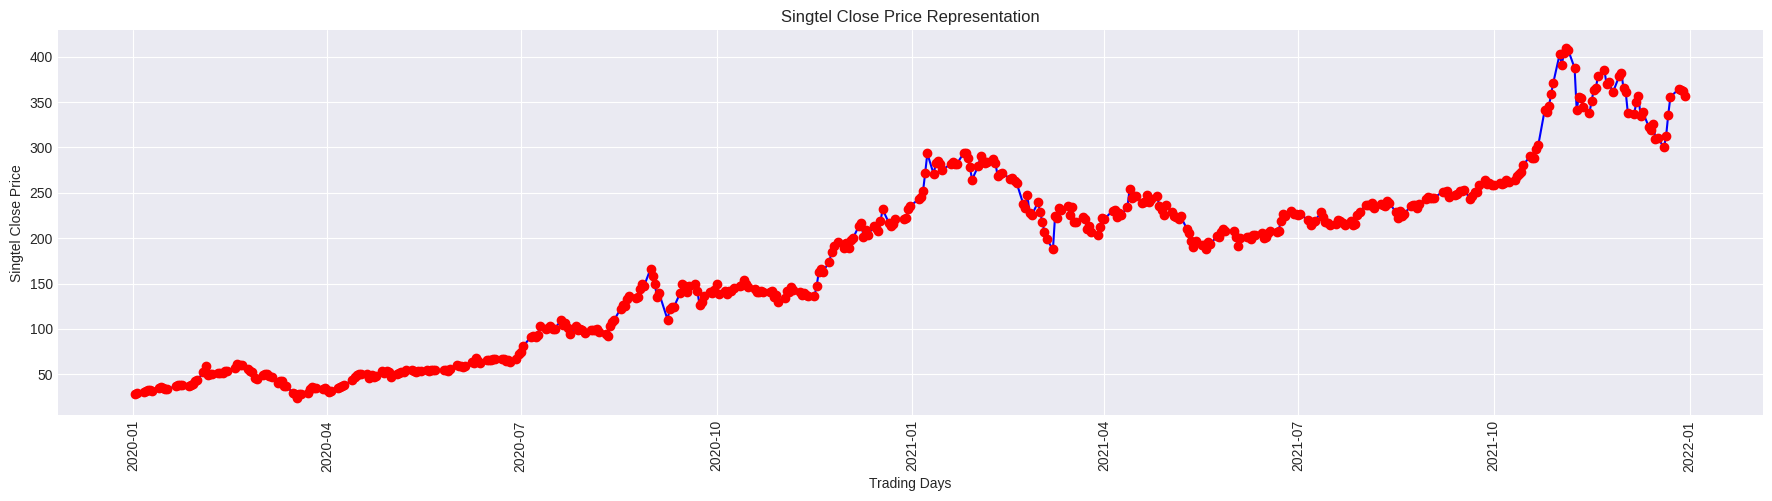

In [4]:
df1 = df.reset_index()
df1 = df1[['Date', 'Close']]
df1.set_index('Date', inplace = True)

import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(22, 5))

plt.plot(df1, 'b')
plt.plot(df1, 'ro')
plt.grid(True)

plt.title('Singtel Close Price Representation')

plt.xlabel('Trading Days')
plt.xticks(rotation=90)

plt.ylabel('Singtel Close Price')

plt.show()



---



#Step 3: Identified a Linear Relationship between the High and Close Price

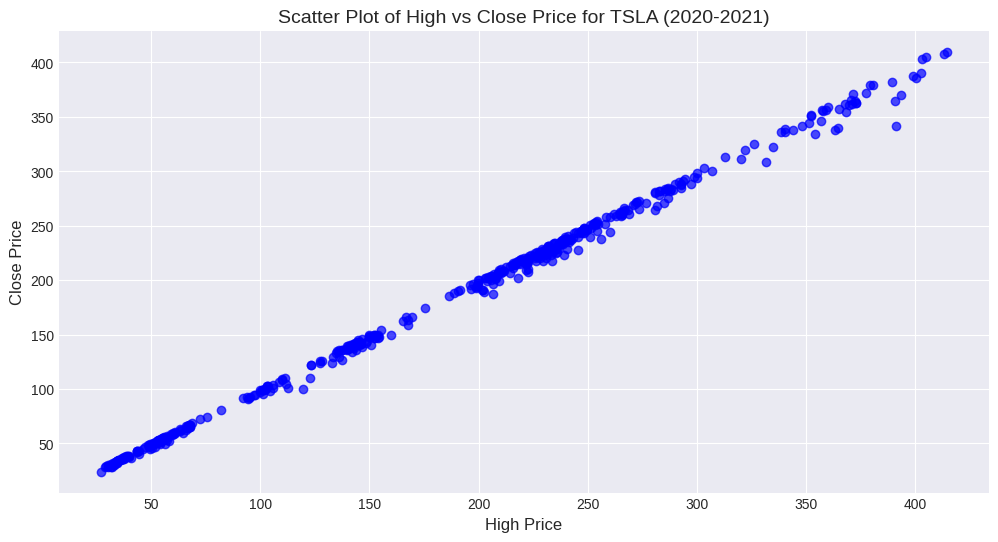

In [5]:
# Plot Scatter Plot of High vs Close Price
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(df['High'], df['Close'], color='blue', alpha=0.7)  # Scatter plot of High vs Close
plt.title('Scatter Plot of High vs Close Price for TSLA (2020-2021)', fontsize=14)
plt.xlabel('High Price', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.grid(True)
plt.show()

In [6]:
#Presume we used yesterday's High price to predict Today's close....
#reason: you will only know today's High after Today's close is out
#thus you can't use Today's high to predict Today's close

X = df['High'].shift(+1)  #yesterday's High
y = df['Close']           #today's Close

df2 = pd.DataFrame({'High' : X,
                   'Close' : y})

df2 = df2.dropna()

X = df2['High']
y = df2['Close']

df2

,High,Close
Date,,
2020-01-03,28.713333,29.534000
2020-01-06,30.266666,30.102667
2020-01-07,30.104000,31.270666
2020-01-08,31.441999,32.809334
2020-01-09,33.232666,32.089333
...,...,...
2021-12-23,338.553345,355.666656
2021-12-27,357.660004,364.646667
2021-12-28,372.333344,362.823334




---



#Step 4: Train Test Split

In [7]:
#first 80 rows for training

split = int(0.8*len(X))

X_train, X_test, y_train, y_test = \
X[:split], X[split:], y[:split], y[split:]

In [8]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)



---



#Step 5: Fit Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression

# Create Regression Model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [11]:
# Use model to make predictions on X test
y_pred = model.predict(X_test)

In [15]:
#Comparing between y_pred vs y_test

comparison = pd.DataFrame({
    'predicted': y_pred.tolist(),
    'actual': y_test.values.tolist()
    })

display(comparison)
#results seems close!

,predicted,actual
0,233.932016,237.919998
1,234.812007,236.663330
2,234.016745,235.940002
3,233.557190,240.750000
4,236.040745,239.056671
...,...,...
96,331.491078,355.666656
97,350.173077,364.646667
98,364.520291,362.823334
99,365.172131,362.063324




---



#Step 6: R2 score

In [16]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred )

#the LR fit between Yesterday's High and TOday's Close is 94%!
#great fit!

0.9443590495016703



---



#Step 7: Prediction

In [17]:
test = model.predict([[200]])
test

#we test the model by giving a fictitous "High" price of $200
#the result tells us that tomorrow's close price will be predicted to be $196.

#in other words, if today's High is $200
# we expect tomorrow's closing price to be $196

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([196.01718407])



---



#THE END

---

